<a href="https://colab.research.google.com/github/daniaguizap/LDA-Topic-Modelling/blob/main/LDA_Topic_Modelling_Github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Import the data**

*Import of company data. The data were previously processed and cleaned*

In [ ]:
import pandas as pd

df_solutions = pd.read_csv("/content/df_final.csv")


# **Step 2: Text cleaning**

In [ ]:
# convert the relevant column to lowercase

df_final['solucion completa'] = df_final['solucion completa'].str.lower()

In [ ]:
# remove contraction
!pip install contractions
import contractions

# Assuming df_solutions_columns is a DataFrame and you want to fix contractions in all string columns
df_final['solucion completa'] = df_final['solucion completa'].map(lambda x: contractions.fix(x) if isinstance(x, str) else x)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 5.5 MB/s eta 0:00:00


In [ ]:
# Remove unwanted characters/objects (e.g. url, email, emoji etc.). You don't need to run all of them, but just take the ones suitable for your case.
# import the re library. Re is a built-in python package, which can be used to work with Regular Expressions.

import re
import string

# First, build a list of commonly used emojis
emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

# Define the cleaning function
def clean_text(x):
    if isinstance(x, str):
        x = re.sub(r'\s+', ' ', x)  # Remove new line characters
        x = re.sub(r'http://\S+|https://\S+', '', x)  # Remove url link
        x = re.sub(r'\S*@\S*\s?', '', x)  # Remove email address
        x = re.sub(emoj, ' ', x)  # Remove emoji
        x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)  # Remove punctuation
        x = re.sub(r'[^A-Za-z]', ' ', x)  # Remove non-word characters
        x = re.sub(r'\s{2,}', ' ', x)  # Remove overspace
    return x

# Apply the cleaning function to the entire DataFrame
df_final['solucion limpia'] = df_final['solucion completa'].map(clean_text)


In [ ]:
df_final.head()

,id_solucion,published_at,es_empresa,solucion completa,solucion limpia
141,142,2020-05-05 01:42:00,0,soluciones de transporte en socavon. utilizan...,soluciones de transporte en socavon utilizando...
199,200,2022-02-23 11:17:00,0,inspecciã³n de polines con ultrasonido acãºsti...,inspecci n de polines con ultrasonido ac stico...
522,543,2020-01-09 18:57:00,0,sistema de deteccion de gets caidos usando vis...,sistema de deteccion de gets caidos usando vis...
523,544,2020-01-07 16:48:00,0,lixs2 - metallurgical service lab 1. emplean h...,lixs metallurgical service lab emplean h o h s...
525,546,2020-01-09 00:50:00,0,replacing cyanide & mercury with a non toxic s...,replacing cyanide mercury with a non toxic sol...


In [ ]:
df_final.isnull().sum()

,0
id_solucion,0
published_at,0
es_empresa,0
solucion completa,0
solucion limpia,0


In [ ]:
df_final.shape

(2588, 5)

# **Step 3: Tokenisation & stop-words removal**

In [ ]:
import nltk
nltk.download('punkt')

# create a list of the reviews from the 'Review' column
words = df_final['solucion limpia'].tolist()

# tokenise the words
from nltk.tokenize import word_tokenize

word_tokens = [] # create an empty list to put the tokenised words
for review in words:
    word_tokens.append(word_tokenize(review))

word_tokens[0]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['soluciones',
 'de',
 'transporte',
 'en',
 'socavon',
 'utilizando',
 'camiones',
 'bas',
 'volvo',
 'de',
 'toneladas',
 'con',
 'tolvas',
 'pusher',
 'y',
 'tolvas',
 'convencionales',
 'mayora',
 'capacidad',
 'de',
 'carga',
 'a',
 'menor',
 'costo',
 'de',
 'operacion',
 'minera',
 'nexa',
 'resources',
 'cerro',
 'lindo']

In [ ]:
# Start dealing with stopwords
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

# use English and Spanish stopwords

# you can also extend the stopwords list with more words that you want to
addition_stopwords = ['vsep', 'ppm', 'eacute','uacute','ntilde', 'oacute',"nbsp", 'aacute', 'iacute', "n","s","a",'ce','ci','bp','ja','cl','bd','pg','eg','iv','fv','ph','j','ii','br','bj','ft','ds','hz','mn','jb','px','dp','ee','jw','wc','xp','zo','c','hx','rl','hp','ms','jp','pa','gb','eu','oz','gl','di','aa','si','rs','hd','sk','rd','z','wi','nf','rt','jg','oy','ap', 'qc', 'hr', 'nm', 'pi', 'mg', 'ac', 'ra', 'mp', 'oc', 'vr', 'cd', 'pc', 'hc', 'p', 'us', 'cc', 'cm', 'kt', 'eh', 'h', 'kw', 'vs', 'b', 'nv', 'ca', 'tm', 'au', 'l', 'ad', 'sw', 'ak', 'dc', 'af', 'io', 'fe', 'ej', 'rx', 'ro', 'il', 'gu', 'mt', 'g', 'rj', 'ot', 'mm', 'ye', 'db', 'va', 'tn', 'pl', 'ug', 'vi', 'li', 'r', 'go', 'fr', 'id', 'u', 'eo', 'rg', 'mc', 'km', 'da', 'zx', 'cv', 'kg', 'qt', 'pb', 'ec', 'rf', 'hg', 'uv', 'sp', 'qa', 'uu', 'kv', 'k', 'f', 'ta', 'hh', 'ml', 'ix', 'uo', 'lm', 'ox', 'ff', 'v', 'pm', 'jc', 'ir', 'sa', 'rb', 'zn', 'mb', 'pt', 'qr', 'js', 'fl', 'w', 'tr', 'ia', 'mo', 'ku', 'wr', 'ge', 'lp', 'hw', 'ah', 'cr', 'sn', 'iq', 'dr', 'eb', 'qb', 'na', 'co', 'op', 'qu', 'tf', 'bg', 'fi', 'bi', 'ab', 'er', 'pr', 'um', 'ul', 'ub', 'ea', 'ai', 'ud', 'rn', 'cu', 'ne', 'hv', 'xm', 'x', 'cb', 'pe', 'gr', 'ba', 'ip', 'ex', 'st', 'aj', 'jk', 'kl', 'ag', 'tb', 'ar']

stopwords = set(stopwords.words("english")) | set(stopwords.words("spanish")) | set(addition_stopwords) #to check the stopwords use print(stopwords)


# create a new list with stop words removed
tokens_without_stopwords = []
for review in word_tokens:
    tokens_without_stopwords.append([w for w in review if not w in stopwords])

tokens_without_stopwords[0]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['soluciones',
 'transporte',
 'socavon',
 'utilizando',
 'camiones',
 'bas',
 'volvo',
 'toneladas',
 'tolvas',
 'pusher',
 'tolvas',
 'convencionales',
 'mayora',
 'capacidad',
 'carga',
 'menor',
 'costo',
 'operacion',
 'minera',
 'nexa',
 'resources',
 'cerro',
 'lindo']

# **Step 4: Lemmatisation**

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
nltk.download('wordnet')

# The lemmatizer requires the correct POS tag to be accurate, if you use the default settings of the WordNetLemmatizer.lemmatize(), the default tag is noun.
# Which means the words other than noun would not be lemmatised, and this is not what we expect.
# Therefore we need to define the POS tags ('n' for nouns(default), 'a' for adj, 'v' for verb, 'r' for adverb) which are allowed to be lemmatised.

lemmatised = []
for review in tokens_without_stopwords:
  n_lemmatised = [lemmatizer.lemmatize(w) for w in review]
  v_lemmatised = [lemmatizer.lemmatize(w,'v') for w in n_lemmatised]
  r_lemmatised = [lemmatizer.lemmatize(w,'r') for w in v_lemmatised]
  a_lemmatised = [lemmatizer.lemmatize(w,'a') for w in r_lemmatised]
  lemmatised.append(a_lemmatised) # here noun, adj, verb, adv are the POS tags that we allowed

lemmatised[0]

[nltk_data] Downloading package wordnet to /root/nltk_data...


['soluciones',
 'transporte',
 'socavon',
 'utilizando',
 'camiones',
 'ba',
 'volvo',
 'toneladas',
 'tolvas',
 'pusher',
 'tolvas',
 'convencionales',
 'mayora',
 'capacidad',
 'carga',
 'menor',
 'costo',
 'operacion',
 'minera',
 'nexa',
 'resource',
 'cerro',
 'lindo']

In [ ]:
# put the tokens back together as text after lemmatisation
import string
rejoin_2 = []
for review in lemmatised: # Here we choose to use stemming instead of lemmatisation
    x = " ".join(review) # join the text back together
    # remove punctuation from the reviews using the string package
    rejoin_2.append(x)

# add the reformed text to the data frame
df_final['after_lematisation'] = rejoin_2

In [ ]:
df_final.head()

,id_solucion,published_at,es_empresa,solucion completa,solucion limpia,after_lematisation
141,142,2020-05-05 01:42:00,0,soluciones de transporte en socavon. utilizan...,soluciones de transporte en socavon utilizando...,soluciones transporte socavon utilizando camio...
199,200,2022-02-23 11:17:00,0,inspecciã³n de polines con ultrasonido acãºsti...,inspecci n de polines con ultrasonido ac stico...,inspecci polines ultrasonido stico ultrasonido...
522,543,2020-01-09 18:57:00,0,sistema de deteccion de gets caidos usando vis...,sistema de deteccion de gets caidos usando vis...,sistema deteccion get caidos usando vision sis...
523,544,2020-01-07 16:48:00,0,lixs2 - metallurgical service lab 1. emplean h...,lixs metallurgical service lab emplean h o h s...,lixs metallurgical service lab emplean nano io...
525,546,2020-01-09 00:50:00,0,replacing cyanide & mercury with a non toxic s...,replacing cyanide mercury with a non toxic sol...,replace cyanide mercury non toxic solution pro...


# **Create a dictionary and a corpus**

In [ ]:
pip install gensim


In [ ]:
import pandas as pd
from gensim import corpora

# Assuming df_final is your DataFrame
# Step 1: Tokenize the text data
texts = [review.split() for review in df_final['after_lematisation']]

# Step 2: Create a dictionary from the tokenized text data
id2word = corpora.Dictionary(texts)

# Step 3: Create a corpus from the dictionary
corpus = [id2word.doc2bow(text) for text in texts]


# Output the results for verification
print("Dictionary:", id2word)
print("Corpus:", corpus)


Dictionary: Dictionary<21898 unique tokens: ['ba', 'camiones', 'capacidad', 'carga', 'cerro']...>
Corpus: [[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1)], [(4, 1), (10, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 2), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 2), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 5), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 2), (81, 2), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 1), (88, 1), (89, 1), (90, 4), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (

# **Steap 4: Build the LDA model**

In [ ]:
# vectorise the data into word counts

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA

max_words = 8000 #how many words taking account for topic modeling
vectorizer = CountVectorizer(max_features=max_words)
vec = vectorizer.fit_transform(df_final['after_lematisation'])

k = 8 #this is the number of the topic. you can decide the number

lda = LDA(n_components=k, max_iter=10, learning_method='online', random_state = 10)
lda.fit(vec)

LatentDirichletAllocation(learning_method='online', n_components=8,
                          random_state=10)

**Calculate the optimal number of K**

Number of Topics: 2, Coherence Score: 0.3892112370777828
Number of Topics: 3, Coherence Score: 0.41715691070092237
Number of Topics: 4, Coherence Score: 0.4238722570177363
Number of Topics: 5, Coherence Score: 0.4418346108491232
Number of Topics: 6, Coherence Score: 0.5195789176846192
Number of Topics: 7, Coherence Score: 0.5027726230460792
Number of Topics: 8, Coherence Score: 0.5504272822537377
Number of Topics: 9, Coherence Score: 0.5187279011050292
Number of Topics: 10, Coherence Score: 0.5271903723576983
Number of Topics: 11, Coherence Score: 0.5034556212562707
Number of Topics: 12, Coherence Score: 0.47593382091404224
Number of Topics: 13, Coherence Score: 0.458677719740125
Number of Topics: 14, Coherence Score: 0.4920510077751469


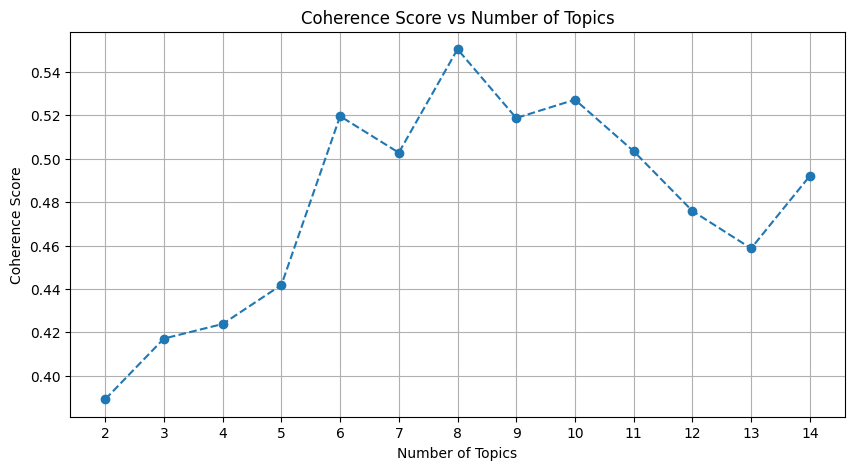

The optimal number of topics is 8 with a coherence score of 0.5504272822537377


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

coherence_scores = []
topic_numbers = range(2, 15)  # Change this range based on your requirement

for k in topic_numbers:
    lda = LDA(n_components=k, max_iter=5, learning_method='online', random_state=10)
    lda.fit(vec)

    # Extract topics and words from the sklearn LDA model
    topics = lda.components_
    topics_words = [[words[i] for i in topic.argsort()[:-11:-1]] for topic in topics]

    # Compute the coherence score using gensim
    coherence_model = CoherenceModel(topics=topics_words, texts=texts, dictionary=id2word, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)
    print(f'Number of Topics: {k}, Coherence Score: {coherence_score}')

# Step 5: Plot the coherence scores against the number of topics
plt.figure(figsize=(10, 5))
plt.plot(topic_numbers, coherence_scores, marker='o', linestyle='--')
plt.title('Coherence Score vs Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.xticks(topic_numbers)
plt.grid(True)
plt.show()

# Find the optimal number of topics
optimal_k = topic_numbers[np.argmax(coherence_scores)]
print(f'The optimal number of topics is {optimal_k} with a coherence score of {max(coherence_scores)}')

# **Steap 5: Visualisation of the topics**

Topic#  1
sistema,veh,drone,culo,culos,cable,mara,lidar,aut,est,tecnolog,lte,seguridad,video,red,zona,lead,iluminaci,bater,metro,robot,condiciones,sensor,equipo,precisi,vuelo,uso,energ,puntos,dise,velocidad,monitoreo,dron,gps,largo,solar,operaci,nivel,minera,tico,alta,emergencia,software,movimientos,horas,fibra,identificar,radio,inal,miner,estructura,puede,posicionamiento,luz,til,tiempo,levantamiento,procesamiento,noma,carga,ticas,rede,magn,industria,condici,sistemas,fico,tipo,normal,nomo,control,vigilancia,neas,rango,ser,ctrico,cuenta,wifi,antamina,esfuerzos,solares,permite,lisis,unidad,siamflex,estaci,estructural,emergencias,temperaturas,tambi,manera,sensores,mbricos,antena,brokk,ctrica,visualizaci,resoluci,medici,panel

Topic#  2
strong,datos,big,trabajadores,tiempo,trabajo,mina,lisis,est,gesti,seguridad,soluci,modelo,covid,proceso,puede,real,operaciones,digital,tecnolog,cualquier,modelos,nea,riesgo,riesgos,mantenimiento,salud,informaci,forma,sistemas,base,ser,pueden,variable,result

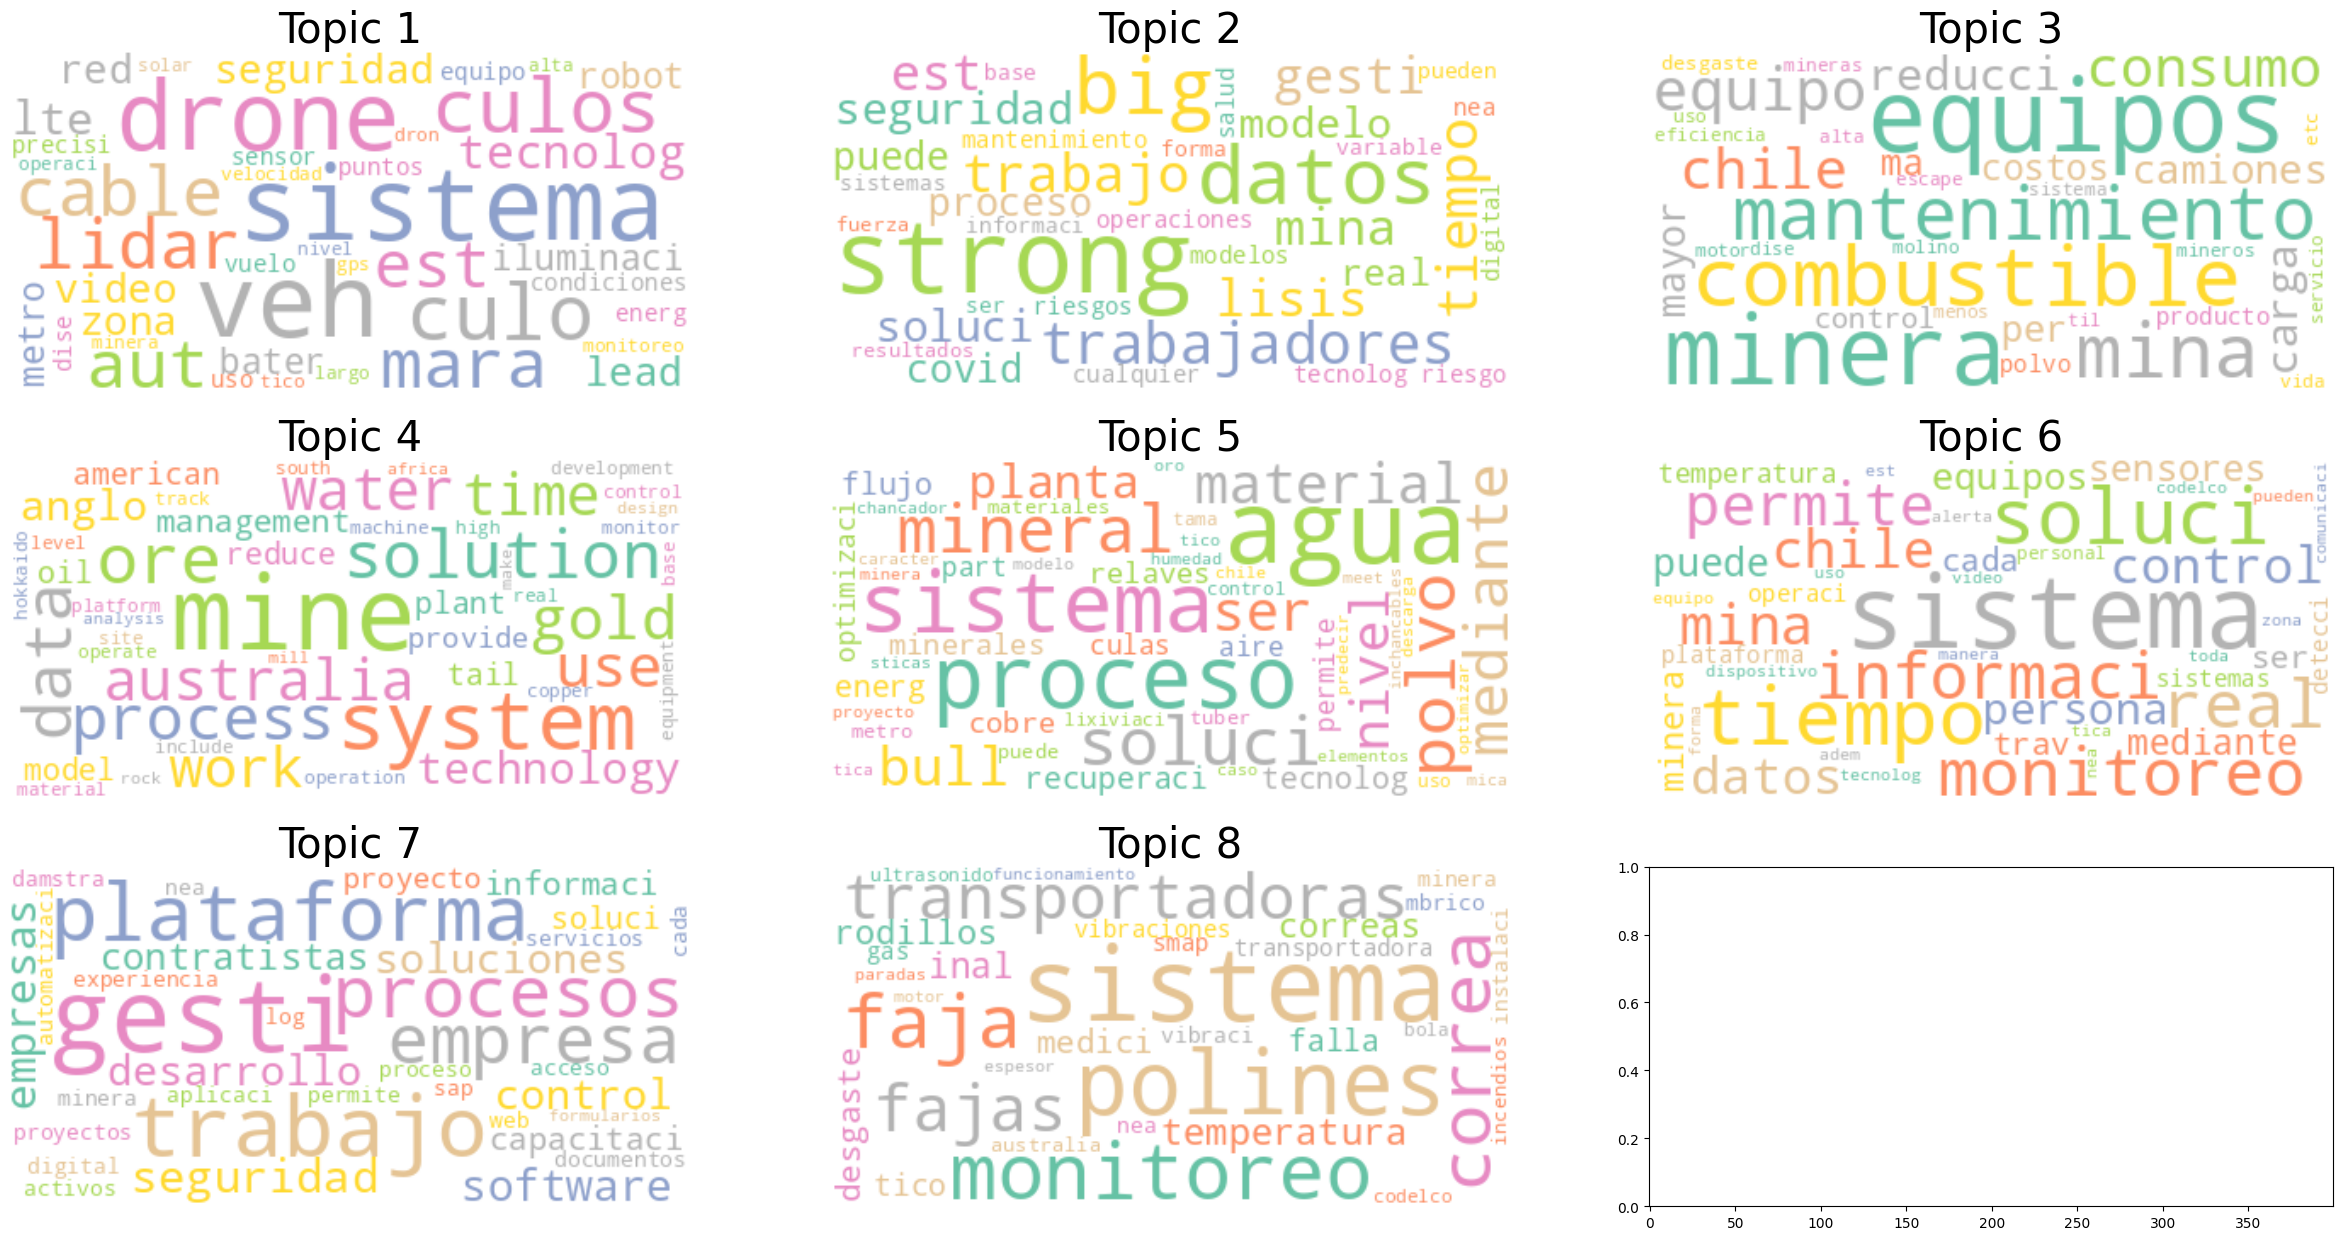

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import wordcloud

#declaring number of terms we need per topic
terms_count = 100

terms = vectorizer.get_feature_names_out()

wcloud = wordcloud.WordCloud(background_color="White",mask=None, max_words=100,\
                             max_font_size=60,min_font_size=10,prefer_horizontal=0.9,
                             contour_width=3,contour_color='Black',colormap='Set2')

fig, axes = plt.subplots(3, 3, figsize=(30, 15), sharex=True)
axes = axes.flatten()

for idx,topic in enumerate(lda.components_):
    print('Topic# ',idx+1)
    abs_topic = abs(topic)
    topic_terms = [[terms[i],topic[i]] for i in abs_topic.argsort()[:-terms_count-1:-1]]
    topic_terms_sorted = [[terms[i], topic[i]] for i in abs_topic.argsort()[:-terms_count - 1:-1]]
    topic_words = []
    for i in range(terms_count):
        topic_words.append(topic_terms_sorted[i][0])
    print(','.join( word for word in topic_words))
    print("")
    dict_word_frequency = {}

    for i in range(terms_count):
        dict_word_frequency[topic_terms_sorted[i][0]] = topic_terms_sorted[i][1]

    ax = axes[idx]
    ax.set_title(f'Topic {idx +1}',fontdict={'fontsize': 30})
    wcloud.generate_from_frequencies(dict_word_frequency)
    ax.imshow(wcloud, interpolation='bilinear')
    ax.axis("off")

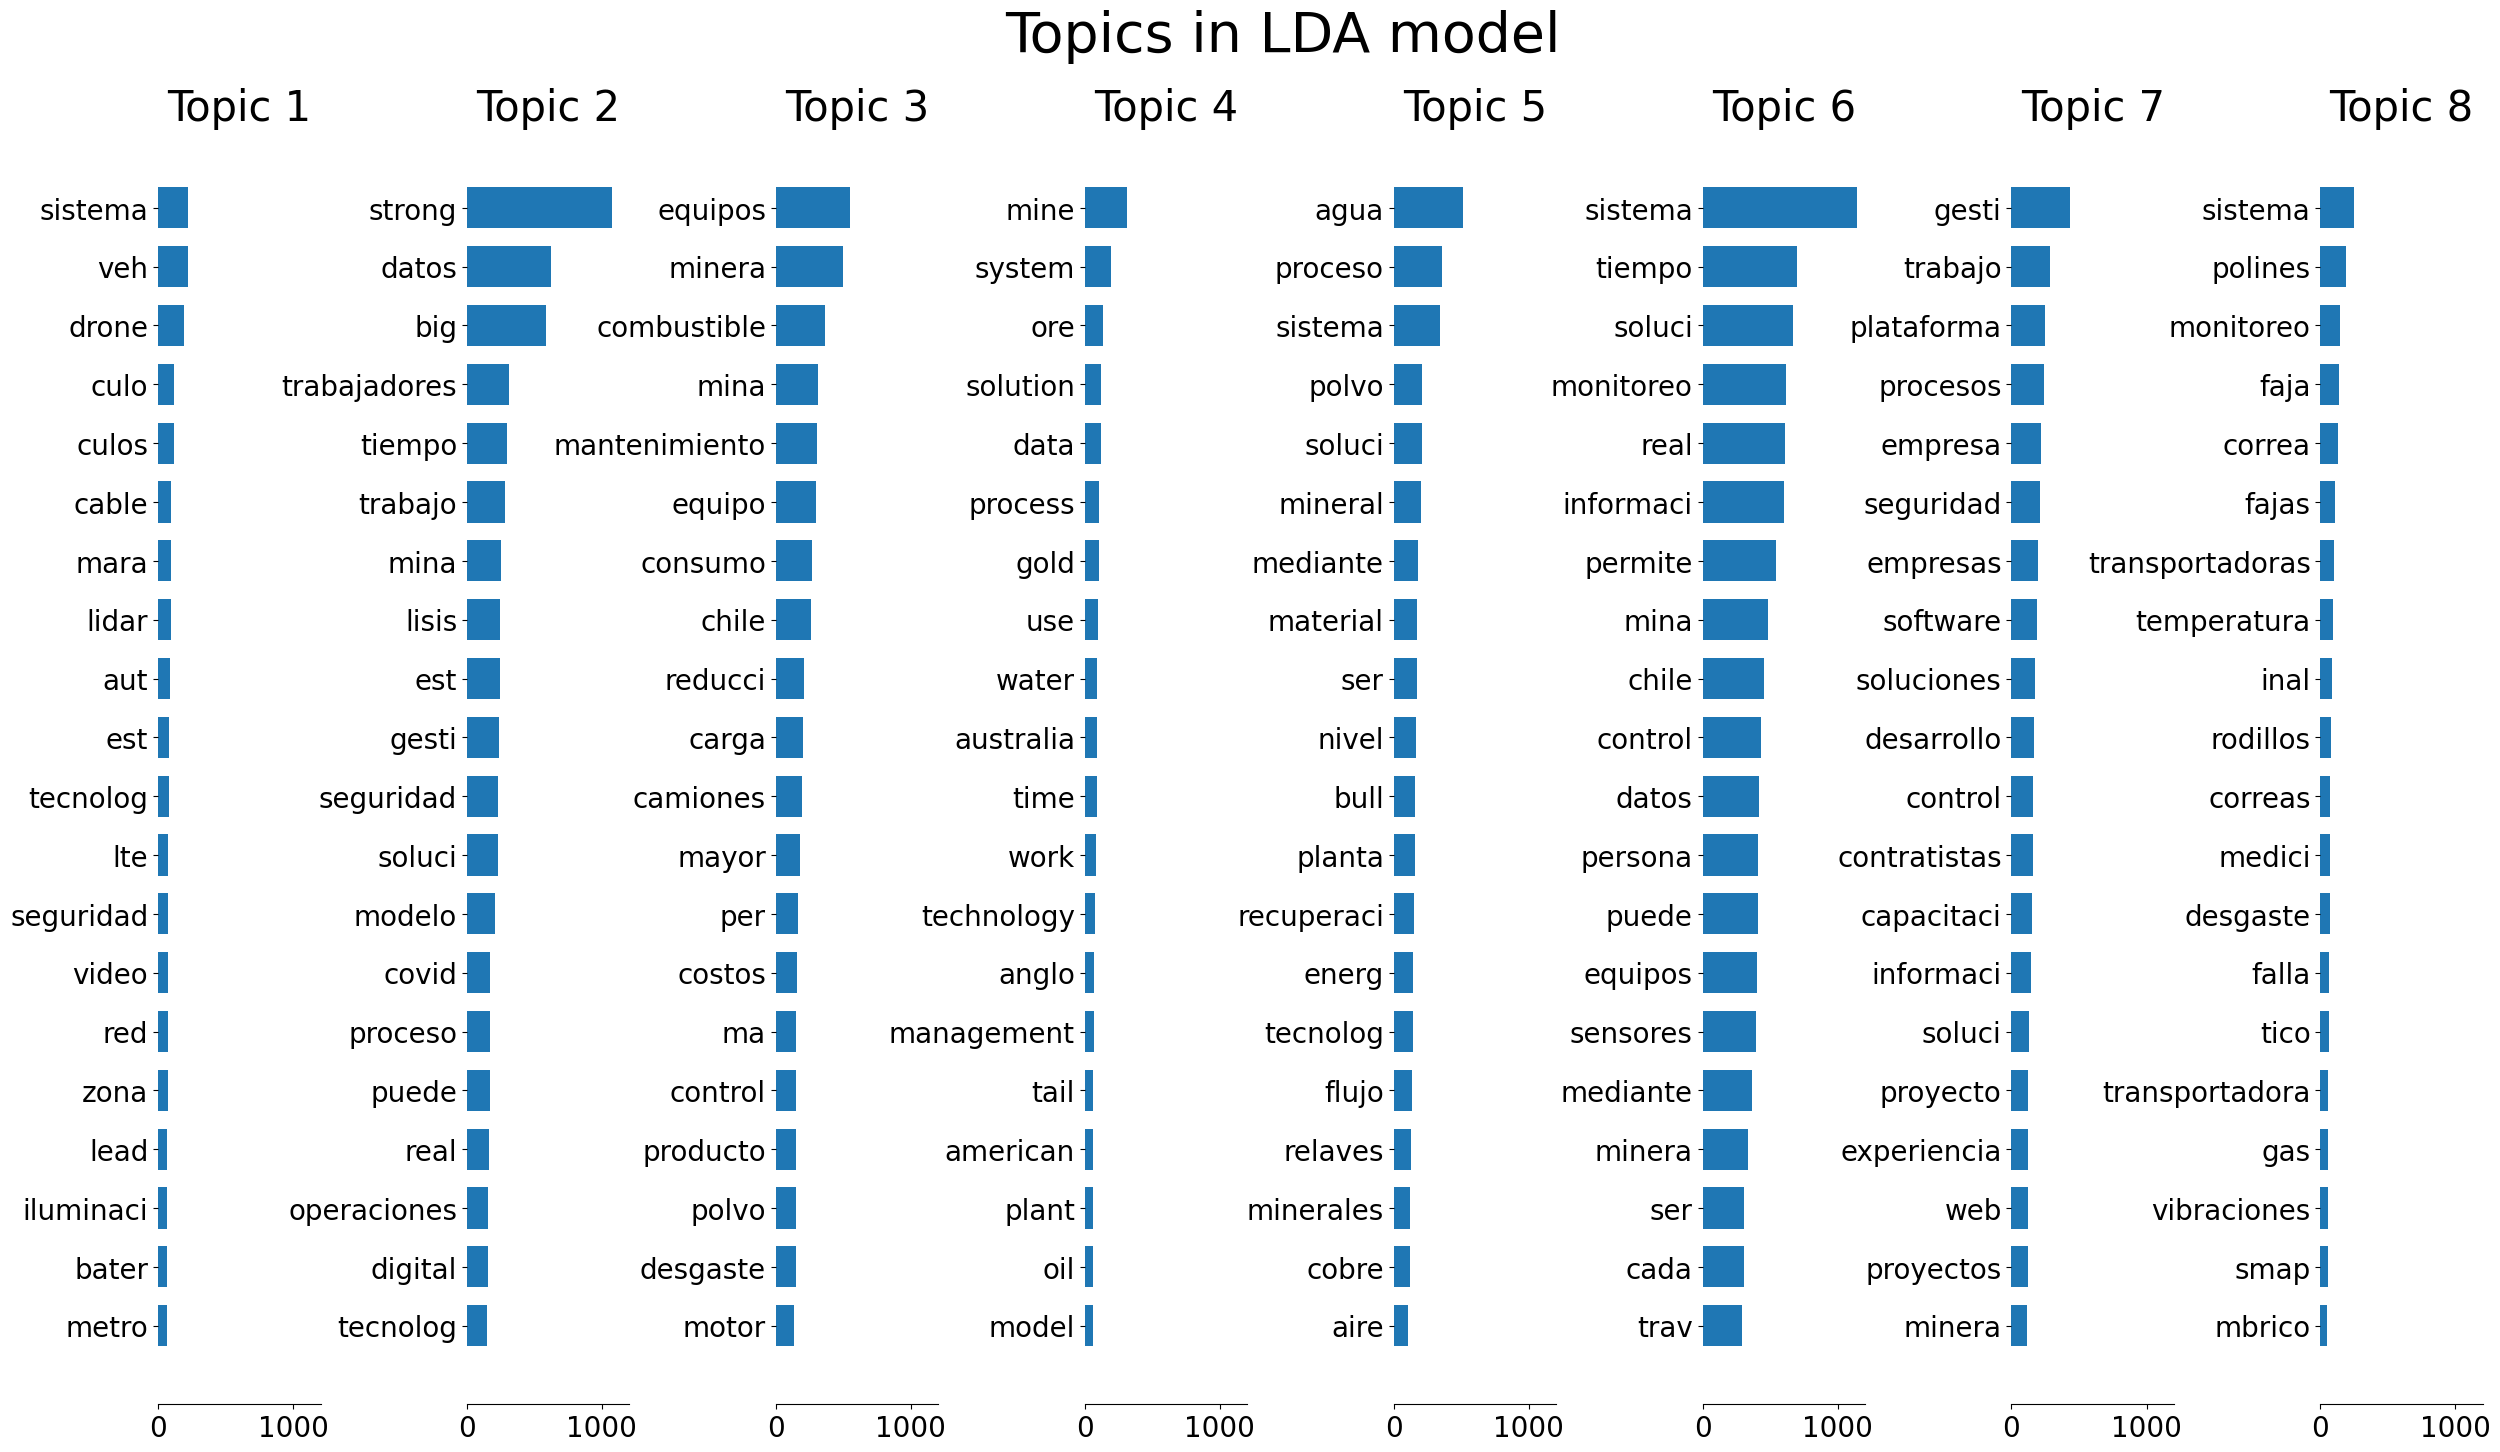

In [ ]:
# Visualise the result into bar charts in topic

%matplotlib inline
import matplotlib.pyplot as plt

# helper function to plot topics
# see Grisel et al.
# https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 8, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

n_top_words = 20  #how many words to be visualised in each topic

# get the list of words (feature names)
vec_feature_names = vectorizer.get_feature_names_out()

# print the top words per topic
plot_top_words(lda, vec_feature_names, n_top_words, 'Topics in LDA model')

# **Steap 7: Download file with assigned topic**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation
from google.colab import files

doc_topic = lda.transform(vec)
docsVStopics = pd.DataFrame(doc_topic, columns=["Topic"+str(i+1) for i in range(k)])
df_final = df_final.reset_index(drop = True)
df = df_final.join(docsVStopics)
df_final['solucion completa'] = docsVStopics.idxmax(axis=1)


df.to_csv('topic_modeling_result.csv', index=False) # save the file to google drive
files.download('topic_modeling_result.csv') # download the file to your local machine

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>